# Free Fall

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          198     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77228D+04    |proj g|=  9.05767D+01

At iterate    1    f=  7.17631D-09    |proj g|=  1.10093D-01

At iterate    2    f=  1.14527D-11    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  198      2      4      3     0     0   0.000D+00   1.145D-11
  F =   1.1452660596444477E-011

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

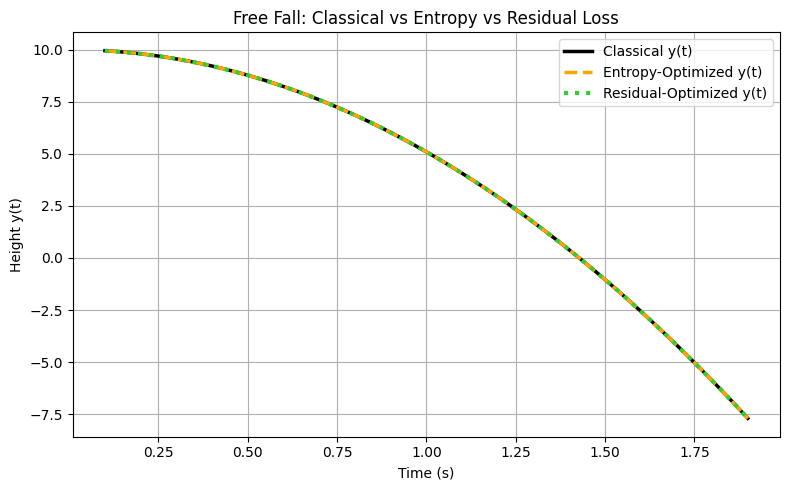

Trajectory           |    Entropy Loss |   Residual Loss
-------------------------------------------------------
Classical            |    1.772283e+04 |    6.044981e-01
Entropy Opt          |    1.145266e-11 |    6.219292e+04
Residual Opt         |    1.780878e+04 |    1.569390e-04


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# ------------------------------------------
# 1. Physical Parameters
# ------------------------------------------
m = 1.0       # mass (kg)
g = 9.81      # gravity (m/s^2)
t_start, t_end = 0.0, 2.0
N = 200
t_eval = np.linspace(t_start, t_end, N)
dt = t_eval[1] - t_eval[0]

# ------------------------------------------
# 2. Classical Free Fall ODE Solver
# ------------------------------------------
def free_fall_ode(t, y):
    pos, vel = y
    return [vel, -g]

y0 = 10.0     # initial height (m)
v0 = 0.0      # initial velocity (m/s)
sol = solve_ivp(free_fall_ode, [t_start, t_end], [y0, v0], t_eval=t_eval)
y_classical = sol.y[0]

# ------------------------------------------
# 3. Loss Functions
# ------------------------------------------

def entropy_loss(y_array):
    ydot = np.gradient(y_array, dt)
    if np.any(np.isnan(y_array)) or np.any(np.abs(y_array) > 1e6):
        return 1e12
    if np.any(np.isnan(ydot)) or np.any(np.abs(ydot) > 1e6):
        return 1e12
    S_final = m * y_array[-1] * ydot[-1]
    return 0.5 * S_final**2

def residual_loss(y_array):
    ydot = np.gradient(y_array, dt)
    yddot = np.gradient(ydot, dt)
    residual = yddot + g
    return np.sum(residual**2) * dt  # Discrete integral of residual^2

# ------------------------------------------
# 4. Optimization Setup
# ------------------------------------------
def optimize(loss_fn, name):
    y_inner_guess = y_classical[1:-1]
    bounds = [(-100.0, y0)] * len(y_inner_guess)

    def objective(y_inner):
        y_full = np.concatenate(([y_classical[0]], y_inner, [y_classical[-1]]))
        return loss_fn(y_full)

    result = minimize(
        objective,
        y_inner_guess,
        method='L-BFGS-B',
        bounds=bounds,
        options={'disp': True, 'maxiter': 1000}
    )

    if not result.success:
        print(f"⚠️ Optimization failed for {name}:", result.message)

    return np.concatenate(([y_classical[0]], result.x, [y_classical[-1]]))

# Run both optimizations
y_entropy_opt = optimize(entropy_loss, "Entropy Loss")
y_residual_opt = optimize(residual_loss, "Residual Loss")

# ------------------------------------------
# 5. Visualization and Comparison
# ------------------------------------------
clip_mask = (t_eval >= 0.1) & (t_eval <= 1.9)
t_clipped = t_eval[clip_mask]
y_classical_clipped = y_classical[clip_mask]
y_entropy_clipped = y_entropy_opt[clip_mask]
y_residual_clipped = y_residual_opt[clip_mask]

plt.figure(figsize=(8,5))
plt.plot(t_clipped, y_classical_clipped, '-', color='black', linewidth=2.5, label='Classical y(t)')
plt.plot(t_clipped, y_entropy_clipped, '--', color='orange', linewidth=2.5, label='Entropy-Optimized y(t)')
plt.plot(t_clipped, y_residual_clipped, ':', color='limegreen', linewidth=3.0, label='Residual-Optimized y(t)')
plt.xlabel("Time (s)")
plt.ylabel("Height y(t)")
plt.title("Free Fall: Classical vs Entropy vs Residual Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("free_fall_plot.png", dpi=300, bbox_inches='tight')
plt.show()

# ------------------------------------------
# 6. Report Final Loss Values
# ------------------------------------------
def final_entropy_loss(y_array):
    ydot = np.gradient(y_array, dt)
    return 0.5 * (m * y_array[-1] * ydot[-1])**2

def final_residual_loss(y_array):
    ydot = np.gradient(y_array, dt)
    yddot = np.gradient(ydot, dt)
    residual = yddot + g
    return np.sum(residual**2) * dt

print(f"{'Trajectory':<20} | {'Entropy Loss':>15} | {'Residual Loss':>15}")
print("-" * 55)
for name, y in [("Classical", y_classical), ("Entropy Opt", y_entropy_opt), ("Residual Opt", y_residual_opt)]:
    e_loss = final_entropy_loss(y)
    r_loss = final_residual_loss(y)
    print(f"{name:<20} | {e_loss:>15.6e} | {r_loss:>15.6e}")


# Harmonic Oscillator

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          198     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58767D-01    |proj g|=  2.49241D+00

At iterate    1    f=  2.95269D-16    |proj g|=  1.26276D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  198      1      3      2     0     1   1.263D-07   2.953D-16
  F =   2.9526915523488000E-016

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          198     M =           10

At X0         0 v

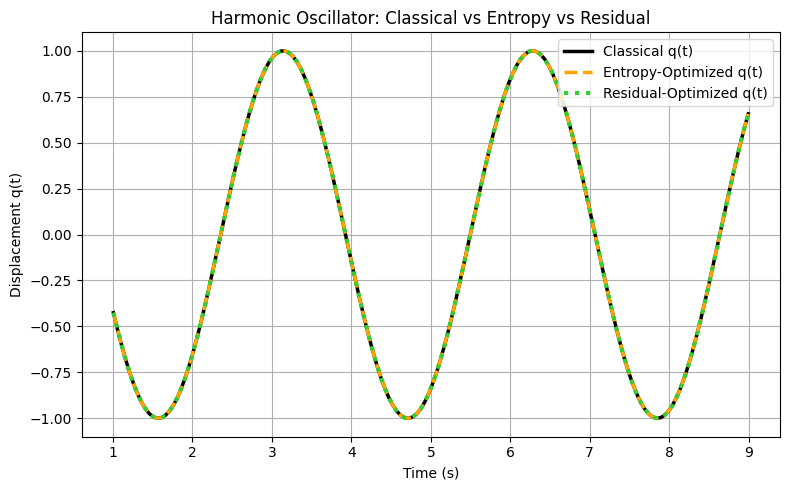

Trajectory           |    Entropy Loss |   Residual Loss
-------------------------------------------------------
Classical            |    2.587672e-01 |    2.872713e-01
Entropy Opt          |    2.952692e-16 |    1.059734e+02
Residual Opt         |    2.696733e-01 |    7.800202e-04


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# ------------------------------------------
# 1. Physical Parameters
# ------------------------------------------
m = 1.0
k = 4.0
omega = np.sqrt(k / m)
t_start, t_end = 0, 10
N = 200
t_eval = np.linspace(t_start, t_end, N)
dt = t_eval[1] - t_eval[0]

# ------------------------------------------
# 2. Classical Harmonic Oscillator ODE
# ------------------------------------------
def ho_ode(t, y):
    q, qdot = y
    return [qdot, -omega**2 * q]

q0, qdot0 = 1.0, 0.0
sol = solve_ivp(ho_ode, [t_start, t_end], [q0, qdot0], t_eval=t_eval)
q_classical = sol.y[0]

# ------------------------------------------
# 3. Loss Functions
# ------------------------------------------
def entropy_loss(q_array):
    qdot = np.gradient(q_array, dt)
    if np.any(np.isnan(q_array)) or np.any(np.abs(q_array) > 1e6):
        return 1e12
    if np.any(np.isnan(qdot)) or np.any(np.abs(qdot) > 1e6):
        return 1e12
    S_final = m * q_array[-1] * qdot[-1]
    return 0.5 * S_final**2

def residual_loss(q_array):
    qdot = np.gradient(q_array, dt)
    qddot = np.gradient(qdot, dt)
    residual = qddot + omega**2 * q_array
    return np.sum(residual**2) * dt

# ------------------------------------------
# 4. Optimization Function
# ------------------------------------------
def optimize(loss_fn, q_start, q_end, name):
    q_inner_guess = q_classical[1:-1]
    bounds = [(-2.0, 2.0)] * len(q_inner_guess)

    def objective(q_inner):
        q_full = np.concatenate(([q_start], q_inner, [q_end]))
        return loss_fn(q_full)

    result = minimize(
        objective,
        q_inner_guess,
        method='L-BFGS-B',
        bounds=bounds,
        options={'disp': True, 'maxiter': 1000}
    )

    if not result.success:
        print(f"⚠️ Optimization failed for {name}:", result.message)

    return np.concatenate(([q_start], result.x, [q_end]))

# ------------------------------------------
# 5. Run Optimizations
# ------------------------------------------
q_entropy_opt = optimize(entropy_loss, q_classical[0], q_classical[-1], "Entropy Loss")
q_residual_opt = optimize(residual_loss, q_classical[0], q_classical[-1], "Residual Loss")

# ------------------------------------------
# 6. Plotting
# ------------------------------------------
clip_mask = (t_eval >= 1.0) & (t_eval <= 9.0)
t_clipped = t_eval[clip_mask]

plt.figure(figsize=(8,5))
plt.plot(t_clipped, q_classical[clip_mask], '-', color='black', linewidth=2.5, label='Classical q(t)')
plt.plot(t_clipped, q_entropy_opt[clip_mask], '--', color='orange', linewidth=2.5, label='Entropy-Optimized q(t)')
plt.plot(t_clipped, q_residual_opt[clip_mask], ':', color='limegreen', linewidth=3.0, label='Residual-Optimized q(t)')
plt.xlabel("Time (s)")
plt.ylabel("Displacement q(t)")
plt.title("Harmonic Oscillator: Classical vs Entropy vs Residual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("harmonic_oscillator_plot.png", dpi=300, bbox_inches='tight')
plt.show()

# ------------------------------------------
# 7. Final Loss Values
# ------------------------------------------
def final_entropy_loss(q_array):
    qdot = np.gradient(q_array, dt)
    return 0.5 * (m * q_array[-1] * qdot[-1])**2

def final_residual_loss(q_array):
    qdot = np.gradient(q_array, dt)
    qddot = np.gradient(qdot, dt)
    residual = qddot + omega**2 * q_array
    return np.sum(residual**2) * dt

print(f"{'Trajectory':<20} | {'Entropy Loss':>15} | {'Residual Loss':>15}")
print("-" * 55)
for name, q in [("Classical", q_classical), ("Entropy Opt", q_entropy_opt), ("Residual Opt", q_residual_opt)]:
    e_loss = final_entropy_loss(q)
    r_loss = final_residual_loss(q)
    print(f"{name:<20} | {e_loss:>15.6e} | {r_loss:>15.6e}")


# Pendulum

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          198     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.57489D-03    |proj g|=  9.10952D-01

At iterate    1    f=  4.13152D-16    |proj g|=  2.74419D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  198      1      3      1     0     0   2.744D-08   4.132D-16
  F =   4.1315204623544931E-016

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          198     M =           10

At X0         0 v

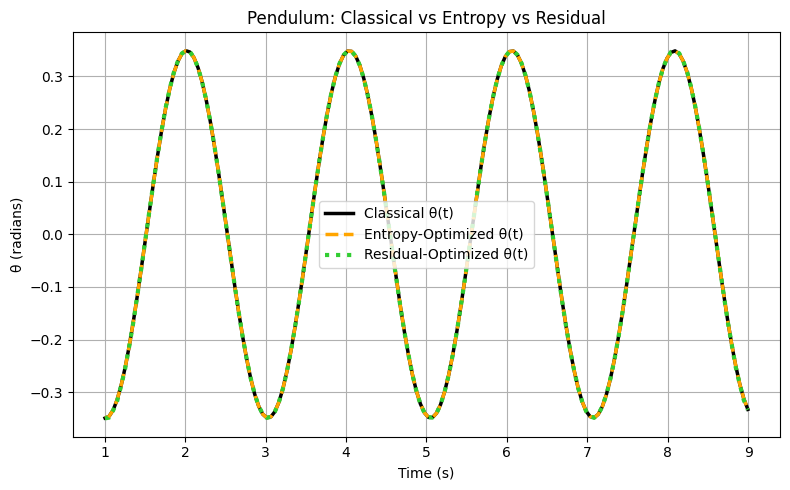

Trajectory           |    Entropy Loss |   Residual Loss
-------------------------------------------------------
Classical            |    9.574893e-03 |    3.641772e-01
Entropy Opt          |    4.131520e-16 |    3.993541e+00
Residual Opt         |    5.781913e-03 |    2.525432e-03


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# ------------------------------------------
# 1. Physical Parameters
# ------------------------------------------
g = 9.81
l = 1.0
m = 1.0
t_start, t_end = 0, 10
N = 200
t_eval = np.linspace(t_start, t_end, N)
dt = t_eval[1] - t_eval[0]

# ------------------------------------------
# 2. Classical Pendulum ODE Solver
# ------------------------------------------
def pendulum_ode(t, y):
    theta, thetadot = y
    return [thetadot, - (g / l) * np.sin(theta)]

theta0 = np.radians(20)
thetadot0 = 0.0
sol = solve_ivp(pendulum_ode, [t_start, t_end], [theta0, thetadot0], t_eval=t_eval)
theta_classical = sol.y[0]

# ------------------------------------------
# 3. Loss Functions
# ------------------------------------------
def entropy_loss(theta_array):
    thetadot = np.gradient(theta_array, dt)
    if np.any(np.isnan(theta_array)) or np.any(np.abs(theta_array) > 1e6):
        return 1e12
    if np.any(np.isnan(thetadot)) or np.any(np.abs(thetadot) > 1e6):
        return 1e12
    S_final = m * theta_array[-1] * thetadot[-1]
    return 0.5 * S_final**2

def residual_loss(theta_array):
    thetadot = np.gradient(theta_array, dt)
    thetaddot = np.gradient(thetadot, dt)
    residual = thetaddot + (g / l) * np.sin(theta_array)
    return np.sum(residual**2) * dt

# ------------------------------------------
# 4. Optimization Routine
# ------------------------------------------
def optimize(loss_fn, theta_start, theta_end, name):
    theta_inner_guess = theta_classical[1:-1]
    bounds = [(-np.pi, np.pi)] * len(theta_inner_guess)

    def objective(theta_inner):
        theta_full = np.concatenate(([theta_start], theta_inner, [theta_end]))
        return loss_fn(theta_full)

    result = minimize(
        objective,
        theta_inner_guess,
        method='L-BFGS-B',
        bounds=bounds,
        options={'disp': True, 'maxiter': 1000}
    )

    if not result.success:
        print(f"⚠️ Optimization failed for {name}: {result.message}")

    return np.concatenate(([theta_start], result.x, [theta_end]))

# ------------------------------------------
# 5. Run Optimizations
# ------------------------------------------
theta_entropy_opt = optimize(entropy_loss, theta_classical[0], theta_classical[-1], "Entropy Loss")
theta_residual_opt = optimize(residual_loss, theta_classical[0], theta_classical[-1], "Residual Loss")

# ------------------------------------------
# 6. Visualization
# ------------------------------------------
clip_mask = (t_eval >= 1.0) & (t_eval <= 9.0)
t_clipped = t_eval[clip_mask]

plt.figure(figsize=(8,5))
plt.plot(t_clipped, theta_classical[clip_mask], '-', color='black', linewidth=2.5, label='Classical θ(t)')
plt.plot(t_clipped, theta_entropy_opt[clip_mask], '--', color='orange', linewidth=2.5, label='Entropy-Optimized θ(t)')
plt.plot(t_clipped, theta_residual_opt[clip_mask], ':', color='limegreen', linewidth=3.0, label='Residual-Optimized θ(t)')
plt.xlabel("Time (s)")
plt.ylabel("θ (radians)")
plt.title("Pendulum: Classical vs Entropy vs Residual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("pendulum_plot.png", dpi=300, bbox_inches='tight')
plt.show()

# ------------------------------------------
# 7. Loss Reporting
# ------------------------------------------
def final_entropy_loss(theta_array):
    thetadot = np.gradient(theta_array, dt)
    return 0.5 * (m * theta_array[-1] * thetadot[-1])**2

def final_residual_loss(theta_array):
    thetadot = np.gradient(theta_array, dt)
    thetaddot = np.gradient(thetadot, dt)
    residual = thetaddot + (g / l) * np.sin(theta_array)
    return np.sum(residual**2) * dt

print(f"{'Trajectory':<20} | {'Entropy Loss':>15} | {'Residual Loss':>15}")
print("-" * 55)
for name, theta in [
    ("Classical", theta_classical),
    ("Entropy Opt", theta_entropy_opt),
    ("Residual Opt", theta_residual_opt)
]:
    e_loss = final_entropy_loss(theta)
    r_loss = final_residual_loss(theta)
    print(f"{name:<20} | {e_loss:>15.6e} | {r_loss:>15.6e}")


# Double Pendulum

RUNNING THE L-BFGS-B CODE

           * * *

⚠️ Entropy Optimization failed: STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
Machine precision = 2.220D-16
 N =          396     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.15834D+00    |proj g|=  1.15083D+00

At iterate    1    f=  3.12199D+00    |proj g|=  2.00000D-02

At iterate    2    f=  3.05505D+00    |proj g|=  4.33205D-01

At iterate    3    f=  2.99182D+00    |proj g|=  3.39276D+00

At iterate    4    f=  2.58650D+00    |proj g|=  1.48194D+00

At iterate    5    f=  2.00762D+00    |proj g|=  9.29500D-01

At iterate    6    f=  1.87711D+00    |proj g|=  4.68465D+00

At iterate    7    f=  1.60207D+00    |proj g|=  8.39539D-01

At iterate    8    f=  1.56619D+00    |proj g|=  5.01893D-01

At iterate    9    f=  1.56294D+00    |proj g|=  2.75275D-01

At iterate   10    f=  1.55330D+00    |proj g|=  7.18607D-02

At iterate   11    f=  1.53762D+00    |proj g|=  3.56554D-01

At 

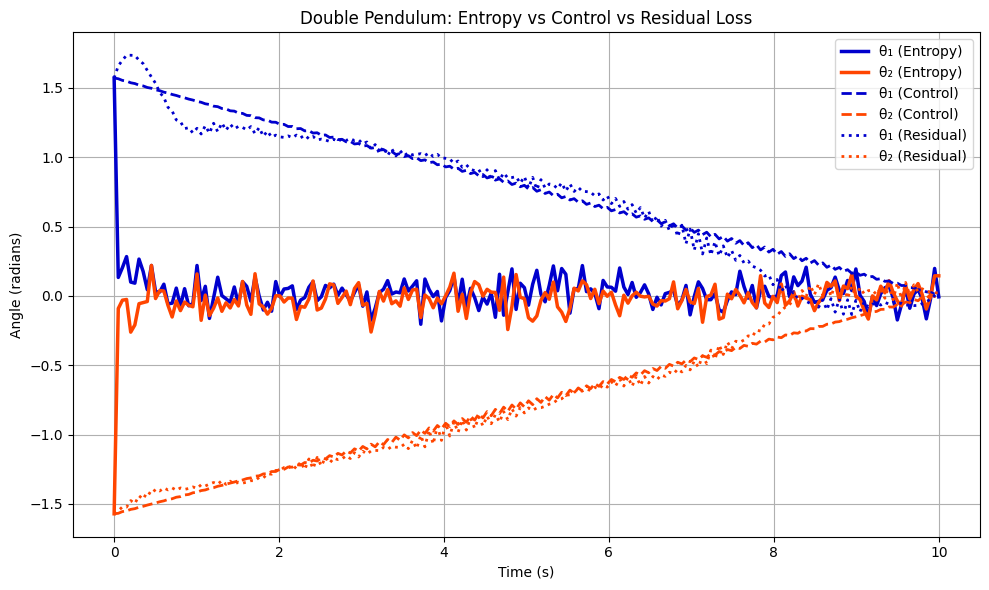


Final Loss Values:
Loss Function        |     Final Value
----------------------------------------
Entropy Loss         |    1.952195e-01
Control Loss         |    4.961740e-01
Residual Loss        |    7.082947e+02


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------
# 1. Simulation Setup
# ------------------------------------------
T = 10.0
N = 200
t_eval = np.linspace(0, T, N)
dt = t_eval[1] - t_eval[0]

m1, m2 = 1.0, 1.0

# ------------------------------------------
# 2. Starting Angles
# ------------------------------------------
theta1_0 = np.pi / 2
theta2_0 = -np.pi / 2

# ------------------------------------------
# 3. Initial Guess: noisy linear path
np.random.seed(42)
theta1_guess = np.linspace(theta1_0, 0, N) + 0.1 * np.random.randn(N)
theta2_guess = np.linspace(theta2_0, 0, N) + 0.1 * np.random.randn(N)

theta1_inner_guess = theta1_guess[1:-1]
theta2_inner_guess = theta2_guess[1:-1]
theta_inner_guess = np.concatenate([theta1_inner_guess, theta2_inner_guess])

# ------------------------------------------
# 4. Loss Functions
# ------------------------------------------
def entropy_loss(theta_flat):
    theta1 = np.zeros(N)
    theta2 = np.zeros(N)
    theta1[0] = theta1_0
    theta2[0] = theta2_0
    theta1[1:-1] = theta_flat[:N-2]
    theta2[1:-1] = theta_flat[N-2:2*(N-2)]
    theta1[-1] = theta_flat[-2]
    theta2[-1] = theta_flat[-1]

    dtheta1_dt = np.gradient(theta1, dt)
    dtheta2_dt = np.gradient(theta2, dt)

    S1 = m1 * theta1[-1] * dtheta1_dt[-1]
    S2 = m2 * theta2[-1] * dtheta2_dt[-1]
    entropy_flow = 0.5 * (S1 + S2)**2

    # Coupling term to avoid symmetric collapse
    coupling = np.sum(np.abs(theta1 - theta2)) * 0.01
    return entropy_flow + coupling

def control_loss(theta_flat):
    theta1 = np.zeros(N)
    theta2 = np.zeros(N)
    theta1[0] = theta1_0
    theta2[0] = theta2_0
    theta1[1:-1] = theta_flat[:N-2]
    theta2[1:-1] = theta_flat[N-2:2*(N-2)]
    theta1[-1] = theta_flat[-2]
    theta2[-1] = theta_flat[-1]

    dtheta1_dt = np.gradient(theta1, dt)
    dtheta2_dt = np.gradient(theta2, dt)

    smoothness = np.sum(dtheta1_dt**2 + dtheta2_dt**2) * dt
    return smoothness

def residual_loss(theta_flat):
    theta1 = np.zeros(N)
    theta2 = np.zeros(N)
    theta1[0] = theta1_0
    theta2[0] = theta2_0
    theta1[1:-1] = theta_flat[:N-2]
    theta2[1:-1] = theta_flat[N-2:2*(N-2)]
    theta1[-1] = theta_flat[-2]
    theta2[-1] = theta_flat[-1]

    dtheta1 = np.gradient(theta1, dt)
    dtheta2 = np.gradient(theta2, dt)
    ddtheta1 = np.gradient(dtheta1, dt)
    ddtheta2 = np.gradient(dtheta2, dt)

    delta = theta1 - theta2
    sin_delta = np.sin(delta)
    cos_delta = np.cos(delta)
    denom = 2 - cos_delta**2
    denom = np.clip(denom, 1e-6, None)  # avoid divide-by-zero

    # Equation residuals
    residual1 = ddtheta1 - (
        -g * (2 * np.sin(theta1) - np.sin(theta2) * cos_delta)
        - sin_delta * (dtheta2**2 + dtheta1**2 * cos_delta)
    ) / denom

    residual2 = ddtheta2 - (
        2 * sin_delta * (
            dtheta1**2 + g * np.cos(theta1) + dtheta2**2 * cos_delta
        )
    ) / denom

    return np.sum(residual1**2 + residual2**2) * dt

# ------------------------------------------
# 5. Optimization Routine
# ------------------------------------------
def run_optimization(loss_fn, name):
    result = minimize(
        loss_fn,
        theta_inner_guess,
        method='L-BFGS-B',
        bounds=[(-2*np.pi, 2*np.pi)] * len(theta_inner_guess),
        options={'disp': True, 'maxiter': 1000}
    )
    if not result.success:
        print(f"⚠️ {name} Optimization failed: {result.message}")

    theta1 = np.zeros(N)
    theta2 = np.zeros(N)
    theta1[0] = theta1_0
    theta2[0] = theta2_0
    theta1[1:-1] = result.x[:N-2]
    theta2[1:-1] = result.x[N-2:2*(N-2)]
    theta1[-1] = result.x[-2]
    theta2[-1] = result.x[-1]
    return theta1, theta2, result.fun

# ------------------------------------------
# 6. Run Both Optimizations
# ------------------------------------------
theta1_entropy, theta2_entropy, loss_entropy = run_optimization(entropy_loss, "Entropy")
theta1_control, theta2_control, loss_control = run_optimization(control_loss, "Control")
theta1_residual, theta2_residual, loss_residual = run_optimization(residual_loss, "Residual")


# ------------------------------------------
# 7. Plot Results
# ------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(t_eval, theta1_entropy, '-', color='mediumblue', linewidth=2.5, label='θ₁ (Entropy)')
plt.plot(t_eval, theta2_entropy, '-', color='orangered', linewidth=2.5, label='θ₂ (Entropy)')
plt.plot(t_eval, theta1_control, '--', color='mediumblue', linewidth=2.0, label='θ₁ (Control)')
plt.plot(t_eval, theta2_control, '--', color='orangered', linewidth=2.0, label='θ₂ (Control)')
plt.plot(t_eval, theta1_residual, ':', color='mediumblue', linewidth=2.0, label='θ₁ (Residual)')
plt.plot(t_eval, theta2_residual, ':', color='orangered', linewidth=2.0, label='θ₂ (Residual)')

plt.xlabel("Time (s)")
plt.ylabel("Angle (radians)")
plt.title("Double Pendulum: Entropy vs Control vs Residual Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("double_pendulum_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

# ------------------------------------------
# 8. Report Final Losses
# ------------------------------------------
print("\nFinal Loss Values:")
print(f"{'Loss Function':<20} | {'Final Value':>15}")
print("-" * 40)
print(f"{'Entropy Loss':<20} | {loss_entropy:>15.6e}")
print(f"{'Control Loss':<20} | {loss_control:>15.6e}")
print(f"{'Residual Loss':<20} | {loss_residual:>15.6e}")


# Triple Pendulum

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          594     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.26886D+00    |proj g|=  7.10791D-02

At iterate    1    f=  6.11361D+00    |proj g|=  1.20998D-01

At iterate    2    f=  5.80925D+00    |proj g|=  2.47911D+00

At iterate    3    f=  4.44469D+00    |proj g|=  4.54123D+00

At iterate    4    f=  3.87477D+00    |proj g|=  1.07236D+00

At iterate    5    f=  3.64929D+00    |proj g|=  5.55350D+00

At iterate    6    f=  3.55424D+00    |proj g|=  2.08949D-01

At iterate    7    f=  3.54756D+00    |proj g|=  2.47748D-01

At iterate    8    f=  3.51939D+00    |proj g|=  6.73310D-02

At iterate    9    f=  2.58528D+00    |proj g|=  9.44607D+00

At iterate   10    f=  1.78334D+00    |proj g|=  1.93383D+00

At iterate   11    f=  1.74622D+00    |proj g|=  7.46093D-01

At iterate   12    f=  1.72943D+00    |proj g|=  4.60591D-01

At iterate   13    f=  1.6

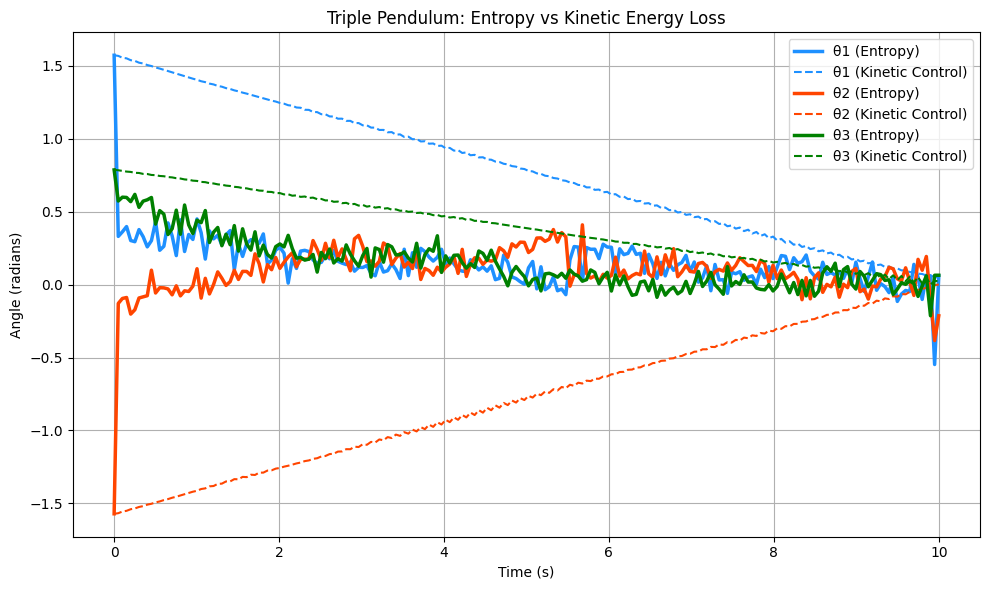

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------
# 1. Simulation Setup
# ------------------------------------------
T = 10.0
N = 200
t_eval = np.linspace(0, T, N)
dt = t_eval[1] - t_eval[0]

m = np.array([1.0, 1.0, 1.0])  # Masses of the three pendulum arms

# ------------------------------------------
# 2. Initial Angles (finals will float)
theta0 = np.array([
    np.pi / 2,       # arm 1
    -np.pi / 2,      # arm 2
    np.pi / 4        # arm 3
])

# Initial guess: noisy linear transitions to zero
np.random.seed(42)
theta_guesses = [
    np.linspace(theta0[i], 0, N) + 0.05 * np.random.randn(N)
    for i in range(3)
]

theta_inner_guess = np.concatenate([
    theta_guesses[i][1:-1] for i in range(3)
])

# ------------------------------------------
# 3. Entropy Loss + Coupling Between Arms
# ------------------------------------------
def entropy_loss(theta_flat):
    thetas = [np.zeros(N) for _ in range(3)]

    # Set initial values
    for i in range(3):
        thetas[i][0] = theta0[i]

    # Fill in intermediates
    for i in range(3):
        thetas[i][1:-1] = theta_flat[i*(N-2):(i+1)*(N-2)]

    # Let entropy determine final values
    for i in range(3):
        thetas[i][-1] = theta_flat[-(3-i)]

    # Compute derivatives
    dthetas_dt = [np.gradient(theta, dt) for theta in thetas]

    # Structural entropy flow
    S = sum([m[i] * thetas[i][-1] * dthetas_dt[i][-1] for i in range(3)])
    entropy_term = 0.5 * S**2

    # Coupling: Penalize arms that are too similar
    pairwise_penalty = 0
    for t in range(N):
        pairwise_penalty += 0.01 * (
            abs(thetas[0][t] - thetas[1][t]) +
            abs(thetas[1][t] - thetas[2][t]) +
            abs(thetas[0][t] - thetas[2][t])
        )

    return entropy_term + pairwise_penalty


def kinetic_energy_loss(theta_flat):
    thetas = [np.zeros(N) for _ in range(3)]
    
    for i in range(3):
        thetas[i][0] = theta0[i]
        thetas[i][1:-1] = theta_flat[i*(N-2):(i+1)*(N-2)]
        thetas[i][-1] = theta_flat[-(3-i)]

    dthetas_dt = [np.gradient(theta, dt) for theta in thetas]
    
    total_energy = 0
    for i in range(3):
        total_energy += np.sum(dthetas_dt[i]**2) * dt
    
    return total_energy


# ------------------------------------------
# 4. Optimization
# ------------------------------------------
bounds = [(-3*np.pi, 3*np.pi)] * len(theta_inner_guess)

result = minimize(
    entropy_loss,
    theta_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 2000}
)

result_control = minimize(
    kinetic_energy_loss,
    theta_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 2000}
)

# ------------------------------------------
# 5. Reconstruct Full Trajectories
# ------------------------------------------
thetas = [np.zeros(N) for _ in range(3)]
for i in range(3):
    thetas[i][0] = theta0[i]
    thetas[i][1:-1] = result.x[i*(N-2):(i+1)*(N-2)]
    thetas[i][-1] = result.x[-(3-i)]

thetas_control = [np.zeros(N) for _ in range(3)]
for i in range(3):
    thetas_control[i][0] = theta0[i]
    thetas_control[i][1:-1] = result_control.x[i*(N-2):(i+1)*(N-2)]
    thetas_control[i][-1] = result_control.x[-(3-i)]

# ------------------------------------------
# 6. Plot Results
# ------------------------------------------
plt.figure(figsize=(10, 6))
colors = ['dodgerblue', 'orangered', 'green']
for i in range(3):
    plt.plot(t_eval, thetas[i], '-', color=colors[i], linewidth=2.5, label=f'θ{i+1} (Entropy)')
    plt.plot(t_eval, thetas_control[i], '--', color=colors[i], linewidth=1.5, label=f'θ{i+1} (Kinetic Control)')
plt.xlabel("Time (s)")
plt.ylabel("Angle (radians)")
plt.title("Triple Pendulum: Entropy vs Kinetic Energy Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("triple_pendulum_comparison.png", dpi=300, bbox_inches='tight')
plt.show()


# Orbit

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          396     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.60583D-15    |proj g|=  1.25035D+01

At iterate    1    f= -2.32954D+04    |proj g|=  1.25664D+01
  ys=-4.612E+04  -gs= 2.353E+02 BFGS update SKIPPED

At iterate    2    f= -3.11902D+04    |proj g|=  6.31440D+00

At iterate    3    f= -3.12677D+04    |proj g|=  3.09228D-02

At iterate    4    f= -3.12677D+04    |proj g|=  1.16415D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  396      4      6      8     1     1   1.164D-02 


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


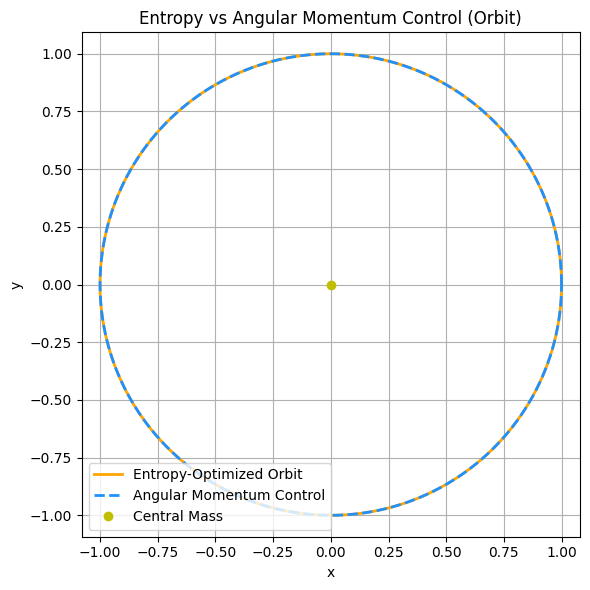


Final Loss Values:
Loss Function                  |           Value
--------------------------------------------------
Entropy Loss                   |   -3.126770e+04
Angular Momentum Residual Loss |    1.873853e-26


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------
# 1. Physical Constants and Time Domain
# ------------------------------------------
G = 1.0      # gravitational constant (arb. units)
M = 1.0      # central mass
m = 1.0      # orbiting mass
A = 0        # entropy-only action (for now)

t_start, t_end = 0.0, 10.0
N = 200
t_eval = np.linspace(t_start, t_end, N)
dt = t_eval[1] - t_eval[0]

# ------------------------------------------
# 2. Initial and Final Conditions
# ------------------------------------------
# Let's define a starting elliptical-like configuration
r0 = 1.0
theta0 = 0.0
rf = 1.0
thetaf = 2 * np.pi  # full orbit sweep (for now)

# Initial guess: elliptical-ish sweep
r_guess = np.linspace(r0, rf, N)
theta_guess = np.linspace(theta0, thetaf, N)

# We'll optimize only the *interior* points
r_inner = r_guess[1:-1]
theta_inner = theta_guess[1:-1]

# Stack them into a single vector for optimization
x0 = np.concatenate([r_inner, theta_inner])  # shape: (2 * (N-2),)

# ------------------------------------------
# 3. Entropy Loss Function
# ------------------------------------------

def entropy_loss(x_flat):
    # Unpack
    r_full = np.concatenate([[r0], x_flat[:N-2], [rf]])
    theta_full = np.concatenate([[theta0], x_flat[N-2:], [thetaf]])

    # Derivatives
    dr_dt = np.gradient(r_full, dt)
    dtheta_dt = np.gradient(theta_full, dt)

    # Structural entropy
    S = m * r_full**2 * dtheta_dt

    # Loss = change in entropy squared
    return 0.5 * (S[-1]**2 - S[0]**2)


def angular_momentum_residual_loss(x_flat):
    r_full = np.concatenate([[r0], x_flat[:N-2], [rf]])
    theta_full = np.concatenate([[theta0], x_flat[N-2:], [thetaf]])

    dtheta_dt = np.gradient(theta_full, dt)
    L = m * r_full**2 * dtheta_dt
    dL_dt = np.gradient(L, dt)

    return np.sum(dL_dt**2) * dt


# ------------------------------------------
# 4. Bounds and Optimization Setup
# ------------------------------------------

# Reasonable bounds for orbiting body (adjust if needed)
r_bounds = [(0.1, 5.0)] * (N - 2)
theta_bounds = [(0, 4 * np.pi)] * (N - 2)
bounds = r_bounds + theta_bounds

result = minimize(
    entropy_loss,
    x0,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)


result_control = minimize(
    angular_momentum_residual_loss,
    x0,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

if not result_control.success:
    print("⚠️ Control Optimization failed:", result_control.message)


# ------------------------------------------
# 5. Reconstruct Optimized Trajectory
# ------------------------------------------
if not result.success:
    print("⚠️ Optimization failed:", result.message)

x_opt = result.x
r_opt = np.concatenate([[r0], x_opt[:N-2], [rf]])
theta_opt = np.concatenate([[theta0], x_opt[N-2:], [thetaf]])

# Convert to Cartesian for plotting
x = r_opt * np.cos(theta_opt)
y = r_opt * np.sin(theta_opt)


x_control = result_control.x
r_control = np.concatenate([[r0], x_control[:N-2], [rf]])
theta_control = np.concatenate([[theta0], x_control[N-2:], [thetaf]])
x_ctrl = r_control * np.cos(theta_control)
y_ctrl = r_control * np.sin(theta_control)

# ------------------------------------------
# 6. Plot the Orbit
# ------------------------------------------
plt.figure(figsize=(6,6))
plt.plot(x, y, label='Entropy-Optimized Orbit', color='orange', linewidth=2)
plt.plot(x_ctrl, y_ctrl, '--', label='Angular Momentum Control', color='dodgerblue', linewidth=2)
plt.plot(0, 0, 'yo', label='Central Mass')
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.title("Entropy vs Angular Momentum Control (Orbit)")
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.savefig("orbit_comparison_plot.png", dpi=300, bbox_inches='tight')
plt.show()

print("\nFinal Loss Values:")
print(f"{'Loss Function':<30} | {'Value':>15}")
print("-" * 50)
print(f"{'Entropy Loss':<30} | {entropy_loss(result.x):>15.6e}")
print(f"{'Angular Momentum Residual Loss':<30} | {angular_momentum_residual_loss(result_control.x):>15.6e}")


## Elliptic Orbit

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3996     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.10639D-02    |proj g|=  6.28633D-03

At iterate    1    f=  0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 3996      1      2      2     0     1   0.000D+00   0.000D+00
  F =   0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3996     M =           10

At X0         0 v

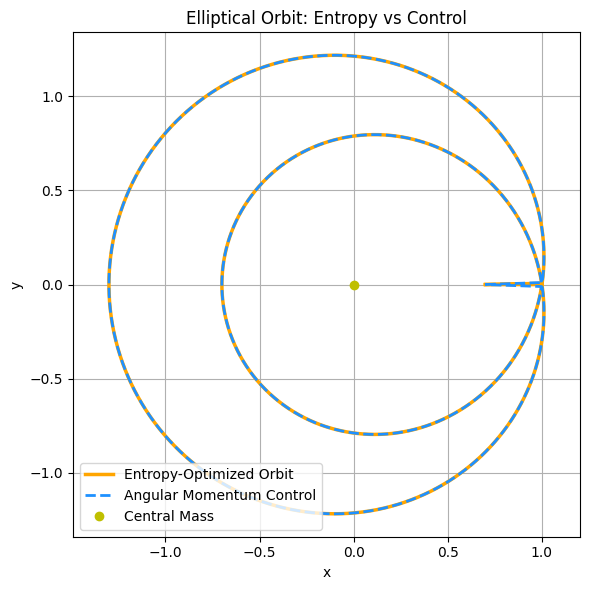


Final Loss Values:
Loss Function                       |     Final Value
-------------------------------------------------------
Entropy Loss                        |    0.000000e+00
Angular Momentum Residual Loss      |    7.935507e-01


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------
# 1. Physical Constants and Time Setup
# ------------------------------------------
G = 1.0        # gravitational constant (unused here)
M = 1.0        # central mass (unused here)
m = 1.0        # orbiting mass
t_start, t_end = 0.0, 30.0
N = 2000
t_eval = np.linspace(t_start, t_end, N)
dt = t_eval[1] - t_eval[0]

# ------------------------------------------
# 2. Periodic Boundary Conditions (Closed Orbit)
# ------------------------------------------
r0 = 0.7
rf = 0.7
theta0 = 0.0
thetaf = 4 * np.pi  # Two full orbits

# Initial elliptical guess for radius and angle
r_guess = 1.0 + 0.3 * np.sin(2 * np.pi * t_eval / (t_end - t_start))
theta_guess = np.linspace(theta0, thetaf, N)

# Extract interior trajectory points for optimization
r_inner = r_guess[1:-1]
theta_inner = theta_guess[1:-1]
x0 = np.concatenate([r_inner, theta_inner])

# ------------------------------------------
# 3. Final Entropy Loss Function
# ------------------------------------------
def entropy_loss(x_flat):
    r_full = np.concatenate([[r0], x_flat[:N-2], [rf]])
    theta_full = np.concatenate([[theta0], x_flat[N-2:], [thetaf]])
    dtheta_dt = np.gradient(theta_full, dt)
    
    if np.any(np.isnan(dtheta_dt)) or np.any(np.abs(dtheta_dt) > 1e6):
        return 1e12

    S_final = m * r_full[-1]**2 * dtheta_dt[-1]
    return 0.5 * S_final**2


def angular_momentum_residual_loss(x_flat):
    r_full = np.concatenate([[r0], x_flat[:N-2], [rf]])
    theta_full = np.concatenate([[theta0], x_flat[N-2:], [thetaf]])
    dtheta_dt = np.gradient(theta_full, dt)

    L = m * r_full**2 * dtheta_dt
    dL_dt = np.gradient(L, dt)

    return np.sum(dL_dt**2) * dt


# ------------------------------------------
# 4. Optimization
# ------------------------------------------
r_bounds = [(0.1, 5.0)] * (N - 2)
theta_bounds = [(0, 4 * np.pi)] * (N - 2)
bounds = r_bounds + theta_bounds

result = minimize(
    entropy_loss,
    x0,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

if not result.success:
    print("⚠️ Optimization failed:", result.message)


result_control = minimize(
    angular_momentum_residual_loss,
    x0,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 2000}
)

if not result_control.success:
    print("⚠️ Control Optimization failed:", result_control.message)


# ------------------------------------------
# 5. Reconstruct and Plot Orbit
# ------------------------------------------
x_opt = result.x
r_opt = np.concatenate([[r0], x_opt[:N-2], [rf]])
theta_opt = np.concatenate([[theta0], x_opt[N-2:], [thetaf]])

# Convert to Cartesian coordinates
x = r_opt * np.cos(theta_opt)
y = r_opt * np.sin(theta_opt)

x_control = result_control.x
r_control = np.concatenate([[r0], x_control[:N-2], [rf]])
theta_control = np.concatenate([[theta0], x_control[N-2:], [thetaf]])

x_ctrl = r_control * np.cos(theta_control)
y_ctrl = r_control * np.sin(theta_control)

plt.figure(figsize=(6,6))
plt.plot(x, y, label='Entropy-Optimized Orbit', color='orange', linewidth=2.5)
plt.plot(x_ctrl, y_ctrl, '--', label='Angular Momentum Control', color='dodgerblue', linewidth=2.0)
plt.plot(0, 0, 'yo', label='Central Mass')
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.title("Elliptical Orbit: Entropy vs Control")
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.savefig("elliptical_orbit_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

print("\nFinal Loss Values:")
print(f"{'Loss Function':<35} | {'Final Value':>15}")
print("-" * 55)
print(f"{'Entropy Loss':<35} | {entropy_loss(result.x):>15.6e}")
print(f"{'Angular Momentum Residual Loss':<35} | {angular_momentum_residual_loss(result_control.x):>15.6e}")


# Cosmic Expansion

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          398     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00000D-05    |proj g|=  3.98999D-02

At iterate    1    f=  1.15154D-16    |proj g|=  1.90485D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  398      1      3      1     0     0   1.905D-08   1.152D-16
  F =   1.1515438968358866E-016

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          398     M =           10

At X0         0 v

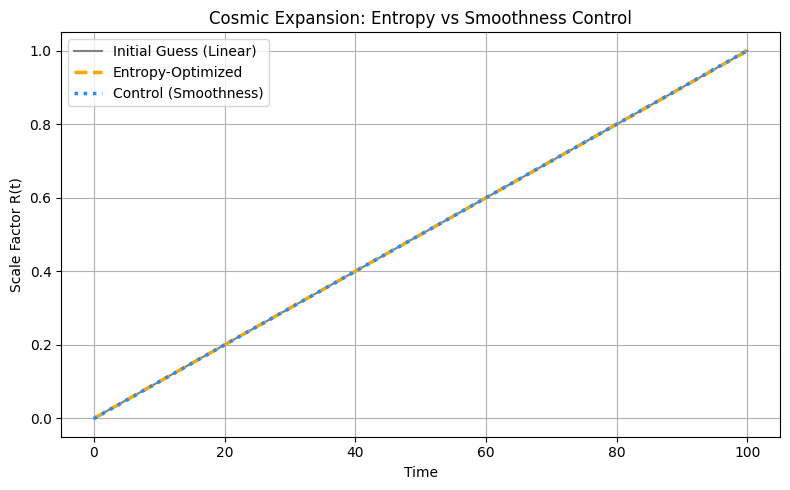


Final Loss Values:
Loss Function                  |     Final Value
--------------------------------------------------
Entropy Loss                   |    1.151544e-16
Control Loss (Smoothness)      |    1.001264e-02


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------------------------
# 1. Long Timeline Cosmic Expansion Setup
# ------------------------------------------------------------
m = 1.0
t_start, t_end = 0.0, 100.0       # simulate over a "cosmic" timeframe
N = 400
t_eval = np.linspace(t_start, t_end, N)
dt = t_eval[1] - t_eval[0]

R0 = 1.0e-35                      # near Planck scale
Rf = 1.0                         # normalized present-day universe scale

# Initial guess: smooth ramp
R_guess = np.linspace(R0, Rf, N)
R_inner_guess = R_guess[1:-1]

# ------------------------------------------------------------
# 2. Entropy Loss Function
# ------------------------------------------------------------
def entropy_loss(R_array):
    Rdot = np.gradient(R_array, dt)
    if np.any(np.isnan(R_array)) or np.any(np.abs(R_array) > 1e12):
        return 1e12
    if np.any(np.isnan(Rdot)) or np.any(np.abs(Rdot) > 1e12):
        return 1e12
    S_final = m * R_array[-1] * Rdot[-1]
    return 0.5 * S_final**2


def control_loss(R_array):
    Rdot = np.gradient(R_array, dt)
    return np.sum(Rdot**2) * dt


def objective(R_inner):
    R_full = np.concatenate(([R0], R_inner, [Rf]))
    return entropy_loss(R_full)


def control_objective(R_inner):
    R_full = np.concatenate(([R0], R_inner, [Rf]))
    return control_loss(R_full)

# ------------------------------------------------------------
# 3. Run the Optimizer
# ------------------------------------------------------------
bounds = [(1e-36, 2.0)] * len(R_inner_guess)

result = minimize(
    objective,
    R_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 2000}
)

R_opt = np.concatenate(([R0], result.x, [Rf]))


result_control = minimize(
    control_objective,
    R_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 2000}
)

R_control = np.concatenate(([R0], result_control.x, [Rf]))


# ------------------------------------------------------------
# 4. Plot Long-Term Expansion
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(t_eval, R_guess, '-', color='gray', linewidth=1.5, label="Initial Guess (Linear)")
plt.plot(t_eval, R_opt, '--', color='orange', linewidth=2.5, label="Entropy-Optimized")
plt.plot(t_eval, R_control, ':', color='dodgerblue', linewidth=2.5, label="Control (Smoothness)")
plt.xlabel("Time")
plt.ylabel("Scale Factor R(t)")
plt.title("Cosmic Expansion: Entropy vs Smoothness Control")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("cosmic_expansion_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

print("\nFinal Loss Values:")
print(f"{'Loss Function':<30} | {'Final Value':>15}")
print("-" * 50)
print(f"{'Entropy Loss':<30} | {entropy_loss(R_opt):>15.6e}")
print(f"{'Control Loss (Smoothness)':<30} | {control_loss(R_control):>15.6e}")

# Black Hole Spacetime Curvature

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          198     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.04553D-03    |proj g|=  1.00454D-01

At iterate    1    f=  6.00269D-13    |proj g|=  2.18132D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  198      1      3      2     0     1   2.181D-06   6.003D-13
  F =   6.0026860429126259E-013

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          198     M =           10

At X0         0 v

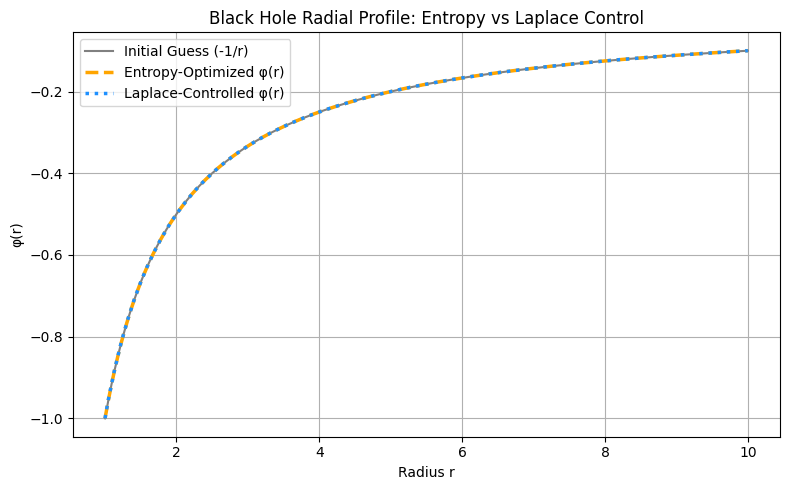


Final Loss Values:
Loss Function                  |     Final Value
--------------------------------------------------
Entropy Loss                   |    0.000000e+00
Laplace Residual Loss          |    7.162531e-06


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------------------------
# 1. Setup: Black Hole Radial Slice
# ------------------------------------------------------------
m = 1.0
Rs = 1.0                 # Schwarzschild radius (set as 1 unit)
Rf = 10.0                # Outer boundary of simulation
N = 200
r_eval = np.linspace(Rs, Rf, N)
dr = r_eval[1] - r_eval[0]

# Initial guess: logarithmic fall-off like -1/r
phi_guess = -1 / r_eval
phi_inner_guess = phi_guess[1:-1]

# ------------------------------------------------------------
# 2. Entropy Loss Function (Curvature in Radial Profile)
# ------------------------------------------------------------
def entropy_loss(phi_array):
    phi_full = np.concatenate(([phi_guess[0]], phi_array, [phi_guess[-1]]))
    dphi_dr = np.gradient(phi_full, dr)

    if np.any(np.isnan(dphi_dr)) or np.any(np.abs(dphi_dr) > 1e6):
        return 1e12

    S_final = m * r_eval[-1] * dphi_dr[-1]
    return 0.5 * S_final**2


def laplace_residual_loss(phi_array):
    phi_full = np.concatenate(([phi_guess[0]], phi_array, [phi_guess[-1]]))
    
    dphi_dr = np.gradient(phi_full, dr)
    d2phi_dr2 = np.gradient(dphi_dr, dr)
    
    # Only compute residual over the interior
    dphi_dr = dphi_dr[1:-1]
    d2phi_dr2 = d2phi_dr2[1:-1]
    r_mid = r_eval[1:-1]

    laplace_residual = d2phi_dr2 + (2 / r_mid) * dphi_dr
    return np.sum(laplace_residual**2) * dr


def objective(phi_inner):
    return entropy_loss(phi_inner)

bounds = [(-100, 0)] * len(phi_inner_guess)

# ------------------------------------------------------------
# 3. Run the Optimizer
# ------------------------------------------------------------
result = minimize(
    objective,
    phi_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

phi_opt = np.concatenate(([phi_guess[0]], result.x, [phi_guess[-1]]))

result_control = minimize(
    laplace_residual_loss,
    phi_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

phi_control = np.concatenate(([phi_guess[0]], result_control.x, [phi_guess[-1]]))

# ------------------------------------------------------------
# 4. Plot Resulting "Potential"
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(r_eval, phi_guess, '-', color='gray', label="Initial Guess (-1/r)", linewidth=1.5)
plt.plot(r_eval, phi_opt, '--', color='orange', linewidth=2.5, label="Entropy-Optimized φ(r)")
plt.plot(r_eval, phi_control, ':', color='dodgerblue', linewidth=2.5, label="Laplace-Controlled φ(r)")
plt.xlabel("Radius r")
plt.ylabel("φ(r)")
plt.title("Black Hole Radial Profile: Entropy vs Laplace Control")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("blackhole_potential_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

print("\nFinal Loss Values:")
print(f"{'Loss Function':<30} | {'Final Value':>15}")
print("-" * 50)
print(f"{'Entropy Loss':<30} | {entropy_loss(phi_opt):>15.6e}")
phi_control_inner = phi_control[1:-1]
print(f"{'Laplace Residual Loss':<30} | {laplace_residual_loss(phi_control_inner):>15.6e}")

# Gravitational Lensing

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        76800     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.12731D+01    |proj g|=  1.99660D+00

At iterate    1    f=  1.54723D-10    |proj g|=  8.21781D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
76800      1      3    121     0   120   8.218D-04   1.547D-10
  F =   1.5472311116851231E-010

STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT        
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        76800     M =           10

At X0         0 v

/var/folders/0m/msvsxyls757fh94g_fldgk4c0000gn/T/ipykernel_6881/3444554890.py:143: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


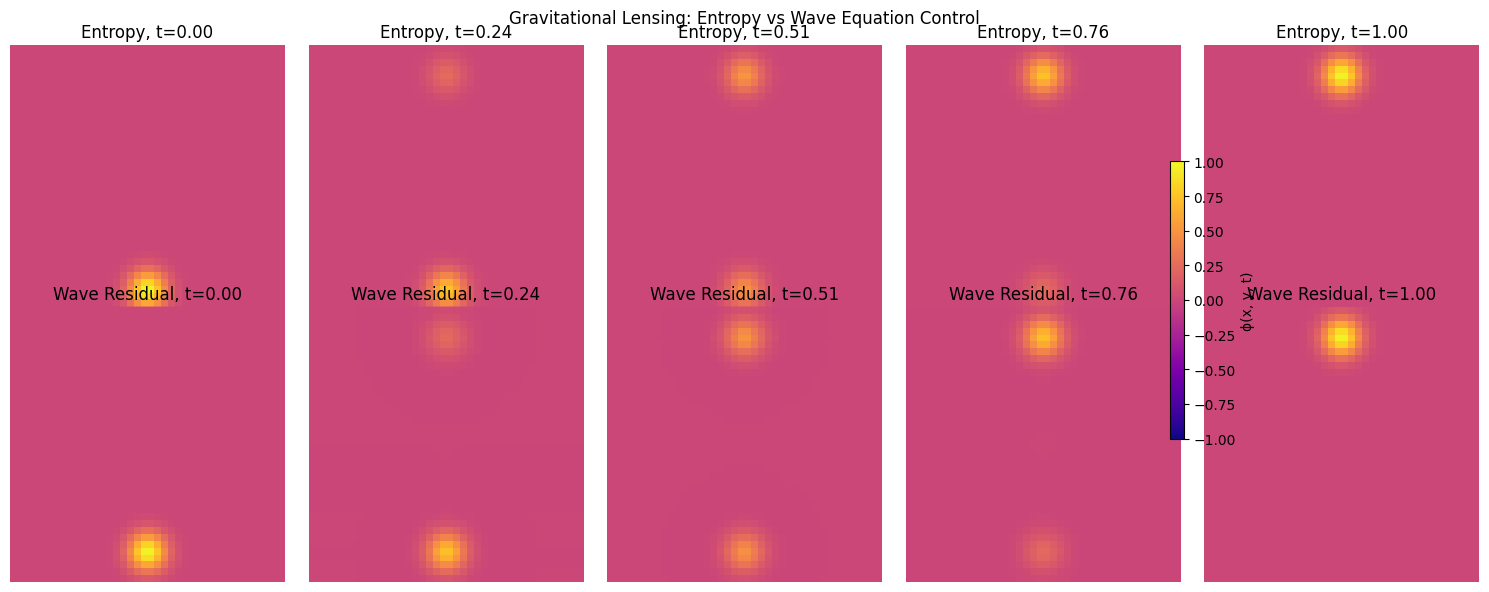


Final Loss Values:
Loss Function                  |     Final Value
--------------------------------------------------
Entropy Loss                   |    1.547231e-10
Wave Equation Residual Loss    |    2.229984e+06


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ------------------------------------------
# 1. Simulation Grid (2D Space + Time)
# ------------------------------------------
Lx, Ly, T = 1.0, 1.0, 1.0
Nx, Ny, Nt = 40, 40, 50

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
t = np.linspace(0, T, Nt)

dx, dy, dt = x[1]-x[0], y[1]-y[0], t[1]-t[0]
X, Y = np.meshgrid(x, y, indexing='ij')

def laplacian(phi_slice, dx, dy):
    d2x = (np.roll(phi_slice, -1, axis=0) - 2 * phi_slice + np.roll(phi_slice, 1, axis=0)) / dx**2
    d2y = (np.roll(phi_slice, -1, axis=1) - 2 * phi_slice + np.roll(phi_slice, 1, axis=1)) / dy**2
    return d2x + d2y

# ------------------------------------------
# 2. Define Initial and Final Conditions
# ------------------------------------------
def initial_condition(X, Y):
    return np.exp(-200 * ((X - 0.1)**2 + (Y - 0.5)**2))


phi_0 = initial_condition(X, Y)
phi_T = np.exp(-200 * ((X - 0.9)**2 + (Y - 0.5)**2))

# ------------------------------------------
# 3. Obstacle Mask (simulate a black hole / mass)
# ------------------------------------------
obstacle_mask = ((X - 0.5)**2 + (Y - 0.5)**2) < 0.05**2  # Small circle in center

# We'll fix this region across all time steps
def apply_obstacle(phi):
    phi[:, obstacle_mask] = 0.0
    return phi

# ------------------------------------------
# 4. Initial Guess
# ------------------------------------------
phi_guess = np.array([
    phi_0 + (phi_T - phi_0) * (ti / T) for ti in t
])
phi_inner_guess = phi_guess[1:-1].reshape(-1)

# ------------------------------------------
# 5. Entropy Loss Function with Obstacle
# ------------------------------------------
def entropy_loss(phi_flat):
    phi = np.zeros((Nt, Nx, Ny))
    phi[0] = phi_0
    phi[-1] = phi_T
    phi[1:-1] = phi_flat.reshape((Nt - 2, Nx, Ny))
    phi = apply_obstacle(phi)  # Apply mask across all times

    dphi_dt = (phi[-1] - phi[-2]) / dt
    S_final = np.sum(phi[-1] * dphi_dt)
    return 0.5 * S_final**2


def wave_equation_residual_loss(phi_flat):
    phi = np.zeros((Nt, Nx, Ny))
    phi[0] = phi_0
    phi[-1] = phi_T
    phi[1:-1] = phi_flat.reshape((Nt - 2, Nx, Ny))
    phi = apply_obstacle(phi)

    loss = 0.0

    for t_idx in range(1, Nt - 1):
        phi_tt = (phi[t_idx + 1] - 2 * phi[t_idx] + phi[t_idx - 1]) / dt**2
        lap = laplacian(phi[t_idx], dx, dy)
        residual = phi_tt - lap
        loss += np.sum(residual**2)

    return loss * dt


# ------------------------------------------
# 6. Run the Optimizer
# ------------------------------------------
bounds = [(-2, 2)] * phi_inner_guess.size

result = minimize(
    entropy_loss,
    phi_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

phi_opt = np.zeros((Nt, Nx, Ny))
phi_opt[0] = phi_0
phi_opt[-1] = phi_T
phi_opt[1:-1] = result.x.reshape((Nt - 2, Nx, Ny))
phi_opt = apply_obstacle(phi_opt)


result_control = minimize(
    wave_equation_residual_loss,
    phi_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

phi_control = np.zeros((Nt, Nx, Ny))
phi_control[0] = phi_0
phi_control[-1] = phi_T
phi_control[1:-1] = result_control.x.reshape((Nt - 2, Nx, Ny))
phi_control = apply_obstacle(phi_control)


# ------------------------------------------
# 7. Static Frame Snapshots for Key Moments
# ------------------------------------------
import matplotlib.pyplot as plt

times_to_plot = [0, Nt//4, Nt//2, 3*Nt//4, Nt-1]

fig, axes = plt.subplots(2, len(times_to_plot), figsize=(15, 6))
for i, t_idx in enumerate(times_to_plot):
    ax1 = axes[0, i]
    ax2 = axes[1, i]

    im1 = ax1.imshow(phi_opt[t_idx], extent=[0, Lx, 0, Ly], origin='lower',
                     cmap='plasma', vmin=-1, vmax=1)
    ax1.set_title(f"Entropy, t={t[t_idx]:.2f}")
    ax1.axis('off')

    im2 = ax2.imshow(phi_control[t_idx], extent=[0, Lx, 0, Ly], origin='lower',
                     cmap='plasma', vmin=-1, vmax=1)
    ax2.set_title(f"Wave Residual, t={t[t_idx]:.2f}")
    ax2.axis('off')

fig.colorbar(im2, ax=axes.ravel().tolist(), shrink=0.6, label="ϕ(x, y, t)")
plt.suptitle("Gravitational Lensing: Entropy vs Wave Equation Control")
plt.tight_layout()
plt.savefig("lensing_comparison_plot.png", dpi=300, bbox_inches='tight')
plt.show()

print("\nFinal Loss Values:")
print(f"{'Loss Function':<30} | {'Final Value':>15}")
print("-" * 50)
print(f"{'Entropy Loss':<30} | {entropy_loss(result.x):>15.6e}")
print(f"{'Wave Equation Residual Loss':<30} | {wave_equation_residual_loss(result_control.x):>15.6e}")

# 3 Body Problem

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1788     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57613D+00    |proj g|=  6.11948D-01

At iterate    1    f=  3.56834D+00    |proj g|=  8.81338D-01

At iterate    2    f=  3.40392D+00    |proj g|=  4.33090D-01

At iterate    3    f=  3.04845D+00    |proj g|=  4.25194D-02

At iterate    4    f=  2.66838D+00    |proj g|=  6.59764D-02

At iterate    5    f=  2.06358D+00    |proj g|=  2.94674D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 1788      5      9      5     0     0   

/var/folders/0m/msvsxyls757fh94g_fldgk4c0000gn/T/ipykernel_6881/792905266.py:132: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("viridis")


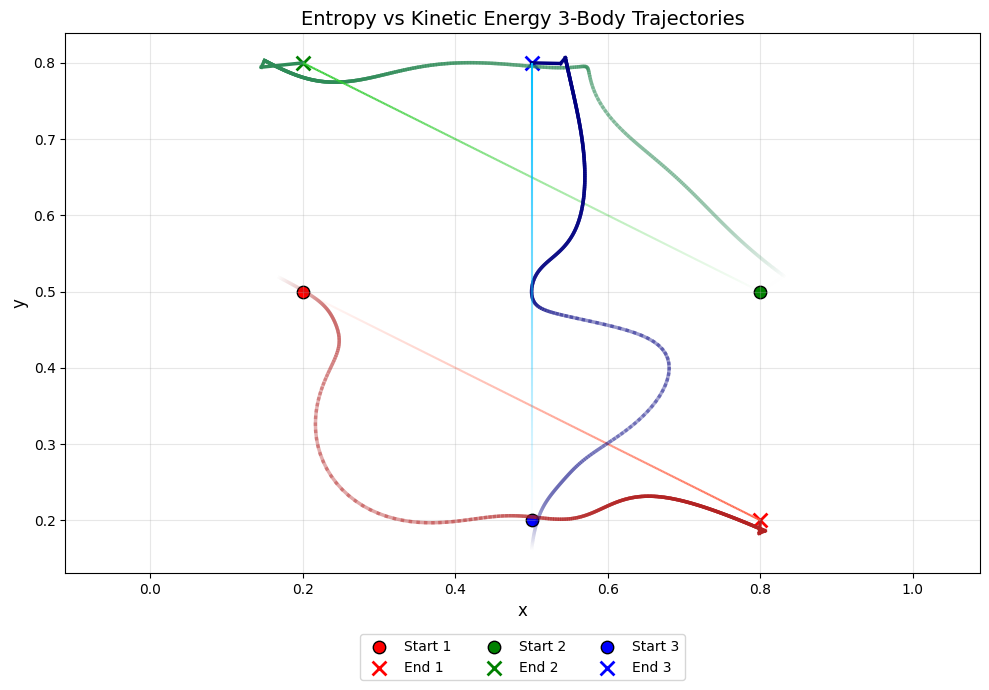


Final Loss Values:
Loss Function                       |     Final Value
-------------------------------------------------------
Entropy Loss                        |    2.063579e+00
Kinetic Energy Loss (Control)       |    3.155463e-02


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib.cm import get_cmap

# ------------------------------------------
# 1. Simulation Parameters
# ------------------------------------------
T = 20.0
N = 300  # Higher resolution
t_eval = np.linspace(0, T, N)
dt = t_eval[1] - t_eval[0]

n_bodies = 3
dim = 2
masses = np.array([1.0, 1.0, 1.0])

# ------------------------------------------
# 2. Initial and Final Positions
# ------------------------------------------
pos0 = np.array([
    [0.2, 0.5],
    [0.8, 0.5],
    [0.5, 0.2]
])

posT = np.array([
    [0.8, 0.2],
    [0.2, 0.8],
    [0.5, 0.8]
])

# ------------------------------------------
# 3. Initial Guess
# ------------------------------------------
def interpolate_linear(start, end, steps):
    return np.array([start + (end - start) * (i / (steps - 1)) for i in range(steps)])

trajectory_guess = np.array([
    interpolate_linear(pos0[i], posT[i], N) for i in range(n_bodies)
])
trajectory_guess = trajectory_guess.transpose((1, 0, 2))
trajectory_inner_guess = trajectory_guess[1:-1].reshape(-1)

# ------------------------------------------
# 4. Entropy Loss with Repulsion
# ------------------------------------------
def entropy_loss(flat_traj):
    traj_inner = flat_traj.reshape((N - 2, n_bodies, dim))
    traj = np.zeros((N, n_bodies, dim))
    traj[0] = pos0
    traj[-1] = posT
    traj[1:-1] = traj_inner

    velocities = np.gradient(traj, dt, axis=0)
    S_components = [
        masses[i] * np.sum(traj[-1, i] * velocities[-1, i])
        for i in range(n_bodies)
    ]
    S_total = np.sum(S_components)

    # Repulsive energy to prevent overlap
    interaction_energy = 0
    for t in range(N):
        for i in range(n_bodies):
            for j in range(i + 1, n_bodies):
                dist = np.linalg.norm(traj[t, i] - traj[t, j])
                interaction_energy += 1.0 / (dist + 1e-3)  # smooth repulsion

    interaction_energy *= 0.001
    return 0.5 * S_total**2 + interaction_energy


def kinetic_energy_loss(flat_traj):
    traj_inner = flat_traj.reshape((N - 2, n_bodies, dim))
    traj = np.zeros((N, n_bodies, dim))
    traj[0] = pos0
    traj[-1] = posT
    traj[1:-1] = traj_inner

    velocities = np.gradient(traj, dt, axis=0)

    total_kinetic_energy = 0.0
    for t in range(N):
        for i in range(n_bodies):
            v = velocities[t, i]
            total_kinetic_energy += 0.5 * masses[i] * np.dot(v, v)

    return total_kinetic_energy * dt


# ------------------------------------------
# 5. Optimization
# ------------------------------------------
bounds = [(-5.0, 5.0)] * trajectory_inner_guess.size  # Give more breathing room

result = minimize(
    entropy_loss,
    trajectory_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

result_control = minimize(
    kinetic_energy_loss,
    trajectory_inner_guess,
    method='L-BFGS-B',
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)


# ------------------------------------------
# 6. Reconstruct Optimized Trajectory
# ------------------------------------------
trajectory_opt = np.zeros((N, n_bodies, dim))
trajectory_opt[0] = pos0
trajectory_opt[-1] = posT
trajectory_opt[1:-1] = result.x.reshape((N - 2, n_bodies, dim))


trajectory_ctrl = np.zeros((N, n_bodies, dim))
trajectory_ctrl[0] = pos0
trajectory_ctrl[-1] = posT
trajectory_ctrl[1:-1] = result_control.x.reshape((N - 2, n_bodies, dim))


# ------------------------------------------
# 7. Plotting
# ------------------------------------------
cmap = get_cmap("viridis")

plt.figure(figsize=(10, 7))
entropy_colors = ['firebrick', 'seagreen', 'navy']
control_colors = ['tomato', 'limegreen', 'deepskyblue']
labels = [f"Body {i+1}" for i in range(n_bodies)]

for i in range(n_bodies):
    x_ent = trajectory_opt[:, i, 0]
    y_ent = trajectory_opt[:, i, 1]
    x_ctrl = trajectory_ctrl[:, i, 0]
    y_ctrl = trajectory_ctrl[:, i, 1]

    # Entropy path (solid)
    for j in range(1, N):
        alpha = j / N
        plt.plot(x_ent[j-1:j+1], y_ent[j-1:j+1], color=entropy_colors[i], alpha=alpha, linewidth=2.5)

    # Control path (dashed)
    for j in range(1, N):
        alpha = j / N
        plt.plot(x_ctrl[j-1:j+1], y_ctrl[j-1:j+1], color=control_colors[i], alpha=alpha, linewidth=1.5, linestyle='--')

    # Start and end markers
    plt.scatter(x_ent[0], y_ent[0], color=colors[i], edgecolor='black', s=80, label=f"Start {i+1}")
    plt.scatter(x_ent[-1], y_ent[-1], color=colors[i], marker='x', s=100, linewidths=2, label=f"End {i+1}")

plt.title("Entropy vs Kinetic Energy 3-Body Trajectories", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.tight_layout()
plt.savefig("entropy_vs_control_3body.png", dpi=300, bbox_inches='tight')
plt.show()

print("\nFinal Loss Values:")
print(f"{'Loss Function':<35} | {'Final Value':>15}")
print("-" * 55)
print(f"{'Entropy Loss':<35} | {entropy_loss(result.x):>15.6e}")
print(f"{'Kinetic Energy Loss (Control)':<35} | {kinetic_energy_loss(result_control.x):>15.6e}")

# Lorenz Attractor

We test Lorenz Attractor with 2 separate goals - minimize entropy, and maximize entropy, to see how the system behaves differently depending on the goal

## Minimize entropy

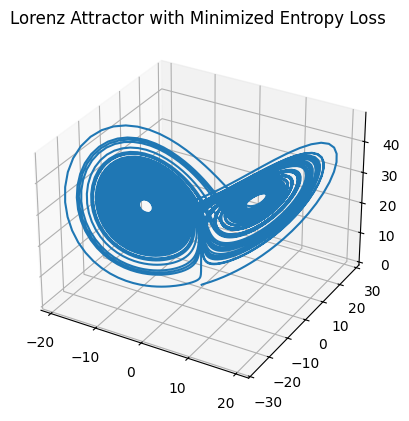

(None,
 np.float64(38.21588862828464),
 array([1.00005503e-01, 5.17649604e-06, 0.00000000e+00]))

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Let's try something crazy: a chaotic system - the Lorenz attractor

# Lorenz system differential equations
def lorenz_system(state, sigma=10.0, rho=28.0, beta=8/3):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return np.array([dx, dy, dz])

# Simulate the Lorenz system
def simulate_lorenz(initial_state, dt=0.01, steps=10000):
    state = np.array(initial_state)
    trajectory = []
    for _ in range(steps):
        k1 = lorenz_system(state)
        k2 = lorenz_system(state + 0.5 * dt * k1)
        k3 = lorenz_system(state + 0.5 * dt * k2)
        k4 = lorenz_system(state + dt * k3)
        state += (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
        trajectory.append(state.copy())
    return np.array(trajectory)

# Define *shannon* entropy over the 3D signal
def entropy_3d(signal):
    hist, _ = np.histogramdd(signal, bins=50, density=True)
    p = hist[hist > 0]
    return -np.sum(p * np.log(p))

# Define the entropy loss function
def entropy_loss_3d(signal):
    S = entropy_3d(signal)
    return 0.5 * S**2

# Objective function to tweak the initial conditions for minimum entropy
def objective_lorenz(initial_state):
    signal = simulate_lorenz(initial_state)
    return entropy_loss_3d(signal)

# Initial guess for Lorenz system starting point
initial_guess = [0.1, 0.0, 0.0]

# Optimize to find the initial state that minimizes entropy loss
result_lorenz = minimize(objective_lorenz, initial_guess, bounds=[(-30, 30), (-30, 30), (0, 50)])

# Simulate with optimized initial state
optimized_trajectory = simulate_lorenz(result_lorenz.x)

# Plot the optimized Lorenz attractor
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(optimized_trajectory[:, 0], optimized_trajectory[:, 1], optimized_trajectory[:, 2])
ax.set_title("Lorenz Attractor with Minimized Entropy Loss")
plt.savefig("lorenz_minimized_entropy.png", dpi=300, bbox_inches='tight')
plt.show(), result_lorenz.fun, result_lorenz.x


## Maximize entropy

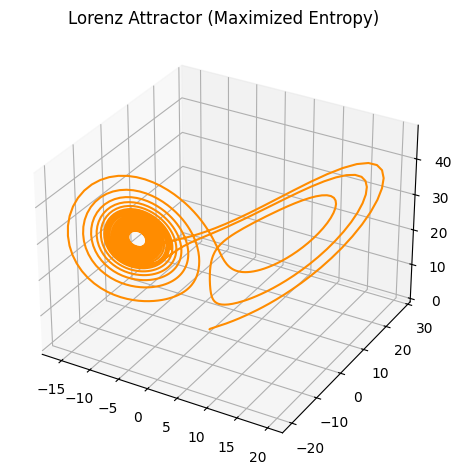

Final entropy: 2.0733167093587035
Initial state used: [0.10542652 0.0002838  0.        ]


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import entropy


# Lorenz equations in NumPy
def lorenz_step(state, sigma=10.0, rho=28.0, beta=8/3):
    x, y, z = state[..., 0], state[..., 1], state[..., 2]
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return np.stack([dx, dy, dz], axis=-1)


# Runge-Kutta integration
def simulate_lorenz_np(initial_state, dt=0.01, steps=2000):
    state = np.array(initial_state)
    trajectory = np.zeros((steps, 3))
    for i in range(steps):
        k1 = lorenz_step(state)
        k2 = lorenz_step(state + 0.5 * dt * k1)
        k3 = lorenz_step(state + 0.5 * dt * k2)
        k4 = lorenz_step(state + dt * k3)
        state = state + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
        trajectory[i] = state
    return trajectory

# Entropy estimation using histogram
def entropy_3d(signal, bins=30):
    hist, _ = np.histogramdd(signal, bins=bins, density=True)
    p = hist[hist > 0]
    return -np.sum(p * np.log(p))  # Shannon entropy

def entropy_loss(signal):
    S = entropy_3d(signal)
    return 0.5 * S**2

# Objective function for entropy maximization
def objective_entropy_max(initial_state):
    signal = simulate_lorenz_np(initial_state)
    return -entropy_loss(signal)  # Maximize entropy = minimize negative entropy

# Run optimization
initial_guess = [0.1, 0.0, 0.0]
result = minimize(objective_entropy_max, initial_guess, bounds=[(-30, 30), (-30, 30), (0, 50)], method='Nelder-Mead')

# Simulate and plot
final_traj = simulate_lorenz_np(result.x)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(final_traj[:, 0], final_traj[:, 1], final_traj[:, 2], color='darkorange')
ax.set_title("Lorenz Attractor (Maximized Entropy)")
plt.tight_layout()
plt.savefig("lorenz_maximized_entropy.png", dpi=300, bbox_inches='tight')
plt.show()

print("Final entropy:", entropy_3d(final_traj))
print("Initial state used:", result.x)
